In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
from sklearn.utils import shuffle
import matplotlib.pyplot as plt
from fungsi import sigmoid

# Generate Data

## Data Otong
Otong orangnya tinggi-kurus

In [2]:
# tinggi badan
x1 = np.array([18 + 1*np.random.randn() for i in range(1,100)])
# berat badan
x2 = np.array([5 + 1*np.random.randn() for i in range(1,100)])
# status Otong
y1 = np.array([1 for i in range(1,100)])
# status Ucup
y2 = np.array([0 for i in range(1,100)])
# label
label = ['otong' for i in range(1,100)]

# data kompilasi
data_otong = {
    'x1' : x1,
    'x2' : x2,
    'y1' : y1,
    'y2' : y2,
    'label' : label
}

# data frame
data_frame_otong = pd.DataFrame(data=data_otong)


In [3]:
print(data_frame_otong)

           x1        x2  y1  y2  label
0   16.545600  4.725797   1   0  otong
1   17.009639  6.790026   1   0  otong
2   17.422965  5.483424   1   0  otong
3   18.097781  5.721039   1   0  otong
4   19.457828  5.204285   1   0  otong
..        ...       ...  ..  ..    ...
94  16.811095  5.866491   1   0  otong
95  18.169570  4.370218   1   0  otong
96  16.357478  5.202983   1   0  otong
97  19.481307  4.368388   1   0  otong
98  17.929670  3.958178   1   0  otong

[99 rows x 5 columns]


## Data Ucup
Ucup orangnya pendek-gemuk

In [4]:
# tinggi badan
x1 = np.array([10 + 1*np.random.randn() for i in range(1,100)])
# berat badan
x2 = np.array([8 + 1*np.random.randn() for i in range(1,100)])
# status Otong
y1 = np.array([0 for i in range(1,100)])
# status Ucup
y2 = np.array([1 for i in range(1,100)])
# label
label = ['ucup' for i in range(1,100)]

# data kompilasi
data_ucup = {
    'x1' : x1,
    'x2' : x2,
    'y1' : y1,
    'y2' : y2,
    'label' : label
}

# data frame
data_frame_ucup = pd.DataFrame(data=data_ucup)

In [5]:
print(data_frame_ucup)

           x1        x2  y1  y2 label
0    9.551770  6.640343   0   1  ucup
1    8.588837  6.571800   0   1  ucup
2   10.115742  8.812853   0   1  ucup
3   11.227833  7.221301   0   1  ucup
4   10.856641  9.159161   0   1  ucup
..        ...       ...  ..  ..   ...
94  10.498168  9.296554   0   1  ucup
95   9.552133  9.505693   0   1  ucup
96   9.098274  8.427027   0   1  ucup
97   9.564986  7.462963   0   1  ucup
98  10.471629  4.809224   0   1  ucup

[99 rows x 5 columns]


## Gabungkan Data

In [6]:
data_frame = pd.concat([data_frame_otong,data_frame_ucup])
data_frame = shuffle(data_frame)
data_frame.reset_index(inplace=True,drop=True)

In [7]:
print(data_frame)

            x1        x2  y1  y2  label
0    16.811095  5.866491   1   0  otong
1    18.777089  6.356971   1   0  otong
2     9.118871  8.915369   0   1   ucup
3    19.697665  5.833603   1   0  otong
4    17.424762  4.177348   1   0  otong
..         ...       ...  ..  ..    ...
193  18.439590  4.354333   1   0  otong
194  11.857132  9.617205   0   1   ucup
195   9.991236  8.182096   0   1   ucup
196  17.422965  5.483424   1   0  otong
197  10.636936  6.382693   0   1   ucup

[198 rows x 5 columns]


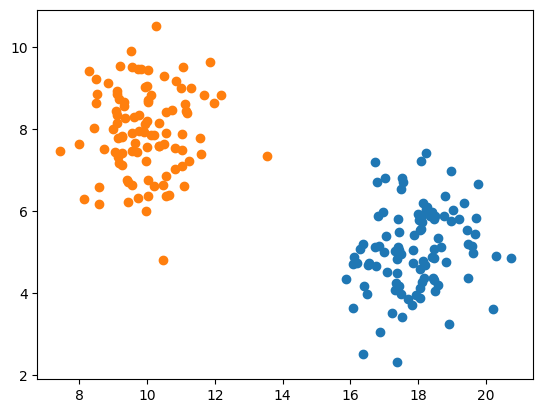

In [8]:
plt.scatter(data_frame_otong.x1,data_frame_otong.x2)
plt.scatter(data_frame_ucup.x1,data_frame_ucup.x2)
plt.show()

# Neural Network

## 1. Matrix Weight

In [9]:
w11 = np.random.uniform(-0.01,0.01)
w12 = np.random.uniform(-0.01,0.01)
w21 = np.random.uniform(-0.01,0.01)
w22 = np.random.uniform(-0.01,0.01)

W = np.array([[w11,w12],[w21,w22]])

In [10]:
print(W)

[[-0.00443232  0.00864702]
 [-0.0099727   0.0038478 ]]


## 2. Iterasi Neural Networknya

In [11]:
learning_rate = 0.1
answer = []
error_array = np.zeros((2,len(data_frame)))
for index,baris in data_frame.iterrows():
    W_lama = W
    input = np.array([[baris.x1],[baris.x2]])
    output_hidden = np.dot(W_lama,input) 
    output_learn = sigmoid(output_hidden)
    output_actual = np.array([[baris.y1],[baris.y2]])
    
    error = output_actual-output_learn

    delta_W = np.dot(learning_rate*error*output_learn*(1-output_learn),input.T)
    
    W_baru = W_lama+delta_W
    W = W_baru

    error_array[:,index] = error.T*error.T
    
    tebakan = np.argmax(output_learn)
    jawaban = np.argmax(output_actual)

    label_tebakan = "ucup" if tebakan==1 else "otong"
    
    print(f"index: {index}, tebakan: {label_tebakan}, jawaban: {baris.label}")

    if tebakan == jawaban:
        answer.append(1)
    else:
        answer.append(0)

index: 0, tebakan: otong, jawaban: otong
index: 1, tebakan: otong, jawaban: otong
index: 2, tebakan: otong, jawaban: ucup
index: 3, tebakan: otong, jawaban: otong
index: 4, tebakan: otong, jawaban: otong
index: 5, tebakan: otong, jawaban: otong
index: 6, tebakan: otong, jawaban: ucup
index: 7, tebakan: otong, jawaban: otong
index: 8, tebakan: otong, jawaban: otong
index: 9, tebakan: otong, jawaban: ucup
index: 10, tebakan: ucup, jawaban: ucup
index: 11, tebakan: ucup, jawaban: ucup
index: 12, tebakan: ucup, jawaban: otong
index: 13, tebakan: ucup, jawaban: ucup
index: 14, tebakan: ucup, jawaban: otong
index: 15, tebakan: otong, jawaban: ucup
index: 16, tebakan: ucup, jawaban: ucup
index: 17, tebakan: ucup, jawaban: ucup
index: 18, tebakan: ucup, jawaban: otong
index: 19, tebakan: otong, jawaban: ucup
index: 20, tebakan: otong, jawaban: otong
index: 21, tebakan: otong, jawaban: otong
index: 22, tebakan: otong, jawaban: otong
index: 23, tebakan: otong, jawaban: otong
index: 24, tebakan: 

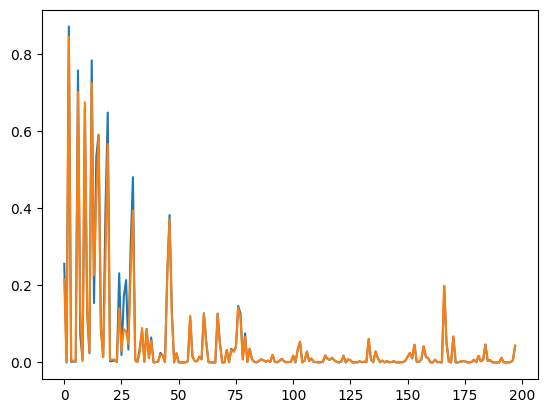

In [12]:
plt.plot(error_array.T)

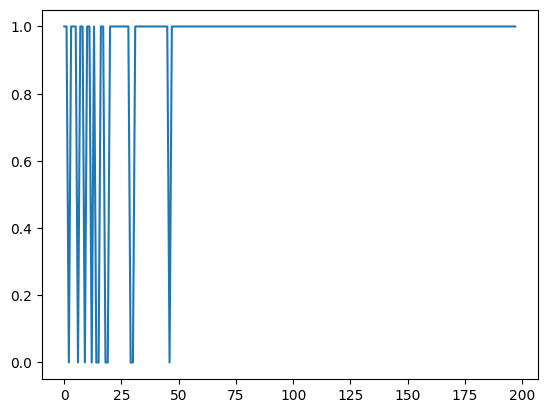

In [13]:
plt.plot(answer)

In [17]:
x1 = 16.5
x2 = 5.5

input = np.array([[x1],[x2]])
output_hidden = np.dot(W,input)
output_prediction = sigmoid(output_hidden)

prediction = np.argmax(output_prediction)

label_prediction = "ucup" if prediction == 1 else "otong"

print(f"tinggi = {x1*10}, berat = {x2*10}, adalah {label_prediction}")

tinggi = 165.0, berat = 55.0, adalah otong
